In [23]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
# Definir la ruta a la carpeta Data
results_path = '../Data'

# Cargar los datos
file_path = os.path.join(results_path, 'Centro_comercial.csv')
df = pd.read_csv(file_path)

In [3]:
# Asignar nombre de variables
df.rename(columns={
    'CustomerID': 'ID_Cliente',
    'Genre': 'Genero',
    'Age': 'Edad',
    'Annual Income (k$)': 'Ingreso_Anual',
    'Spending Score (1-100)': 'Puntaje_Gasto'
}, inplace=True)

df['Genero'] = df['Genero'].map({'Male': 'Masculino', 'Female': 'Femenino'})

In [4]:
# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
df.head()


Primeras filas del DataFrame:


,ID_Cliente,Genero,Edad,Ingreso_Anual,Puntaje_Gasto
0,1,Masculino,19,15,39
1,2,Masculino,21,15,81
2,3,Femenino,20,16,6
3,4,Femenino,23,16,77
4,5,Femenino,31,17,40


In [5]:
# Descripción general del DataFrame
print("Descripción general de los datos:")
print(df.info())

Descripción general de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Cliente     200 non-null    int64 
 1   Genero         200 non-null    object
 2   Edad           200 non-null    int64 
 3   Ingreso_Anual  200 non-null    int64 
 4   Puntaje_Gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Estructura de los Datos:

El DataFrame contiene 200 registros y 5 columnas, con los tipos de datos esperados: 4 columnas numéricas y 1 columna categórica (Género).
No hay valores nulos ni filas duplicadas, los datos están completos y listos para análisis adicionales.

In [6]:
# formato de las columnas
df['ID_Cliente'] = df['ID_Cliente'].astype(str)
df['Genero'] = df['Genero'].astype(str)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())
print(" ")
# Tabla de frecuencia para la variable 'Gender'
tabla_frecuencia = df['Genero'].value_counts()
print("Tabla de frecuencia de la variable 'Genero':")
print(tabla_frecuencia)

# valores flatantes
print("Conteo de valores faltantes por columna:")
print(df.isnull().sum())

# Verificar si hay filas duplicadas
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Estadísticas descriptivas:
             Edad  Ingreso_Anual  Puntaje_Gasto
count  200.000000     200.000000     200.000000
mean    38.850000      60.560000      50.200000
std     13.969007      26.264721      25.823522
min     18.000000      15.000000       1.000000
25%     28.750000      41.500000      34.750000
50%     36.000000      61.500000      50.000000
75%     49.000000      78.000000      73.000000
max     70.000000     137.000000      99.000000
 
Tabla de frecuencia de la variable 'Genero':
Femenino     112
Masculino     88
Name: Genero, dtype: int64
Conteo de valores faltantes por columna:
ID_Cliente       0
Genero           0
Edad             0
Ingreso_Anual    0
Puntaje_Gasto    0
dtype: int64
Número de filas duplicadas: 0


Estadísticas Descriptivas:

- Edad: El rango de edades es amplio (18 a 70 años), con una media de 38.85 años y una desviación estándar de 13.97, lo que indica una dispersión razonable en la distribución de la edad.
- Ingreso Anual: Varía entre 15,000 y 137,000 con una media de 60,560. La desviación estándar de 26,264 también indica una considerable variación en los ingresos anuales de los clientes.
- Puntaje de Gasto: Varía de 1 a 99, con una media de 50.2 y una desviación estándar de 25.82, lo que sugiere una distribución uniforme entre clientes que gastan poco y aquellos que gastan mucho.

Observando los cuartiles:
- El 25% de los clientes tiene un puntaje de gasto inferior a 34.75, lo que puede indicar un segmento con menor poder adquisitivo o menor interés en el consumo en el centro comercial.
- El 75% tiene un puntaje de gasto inferior a 73, con un máximo de 99, lo que refleja una gama significativa de comportamiento de gasto.

Distribución de Género:
- Hay más mujeres (112) que hombres (88) en la muestra, pero la diferencia no es drástica. Este balance casi equitativo permite que cualquier análisis de segmentación por género sea representativo.

Calidad de los Datos:
No hay valores faltantes ni duplicados, lo que facilita un análisis limpio sin necesidad de imputar o eliminar datos.


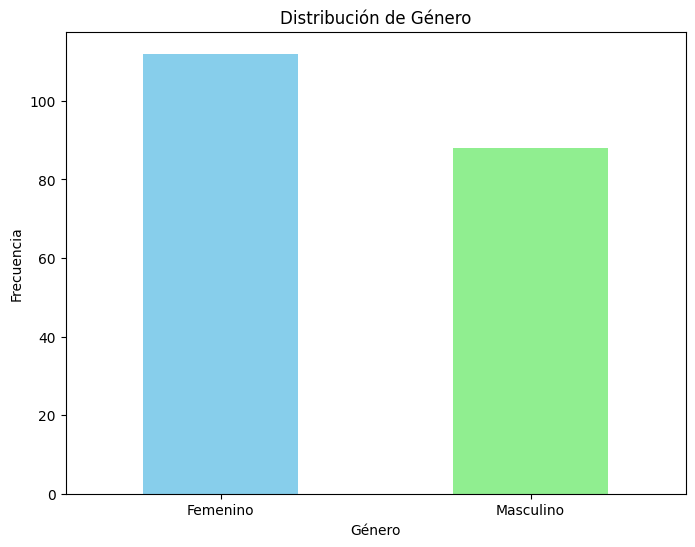

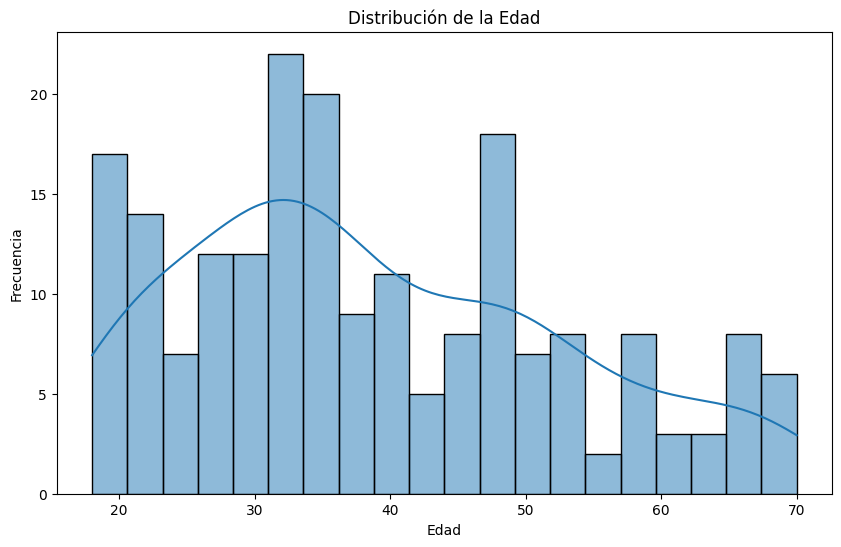

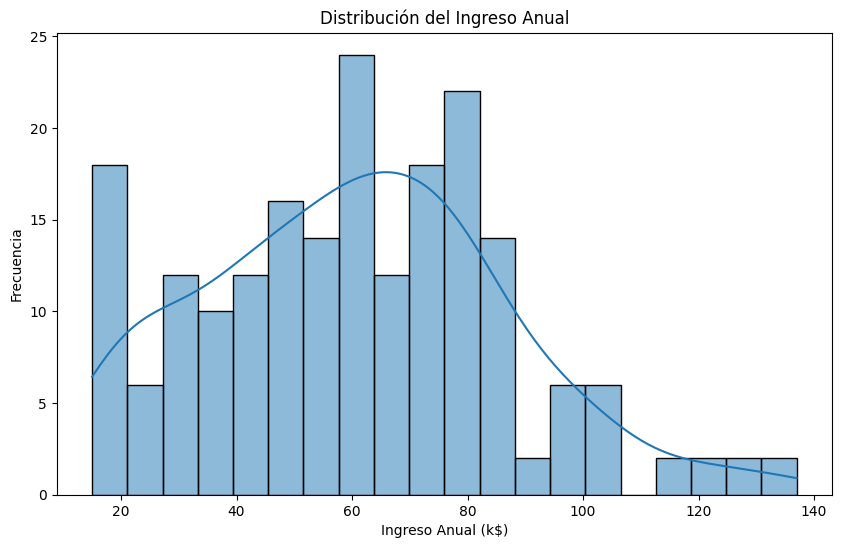

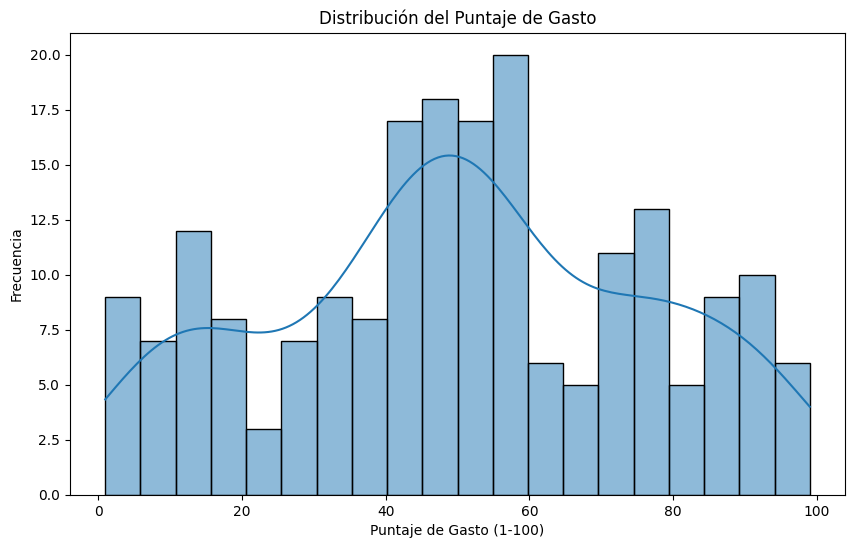

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24832\393337251.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


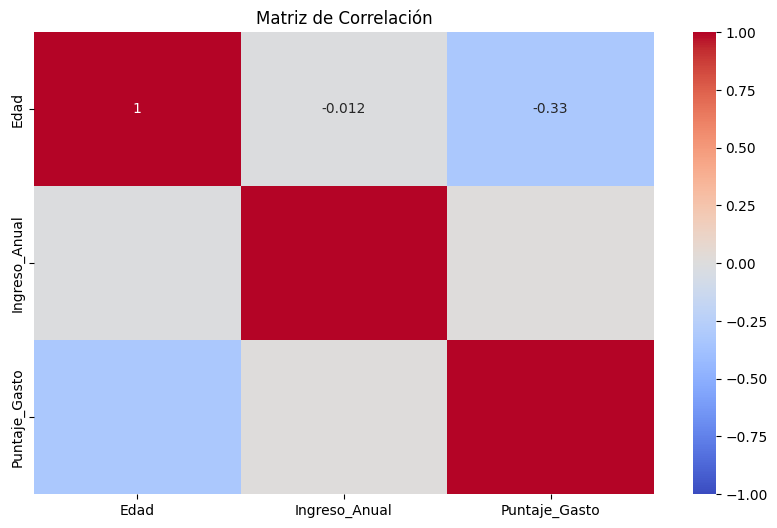

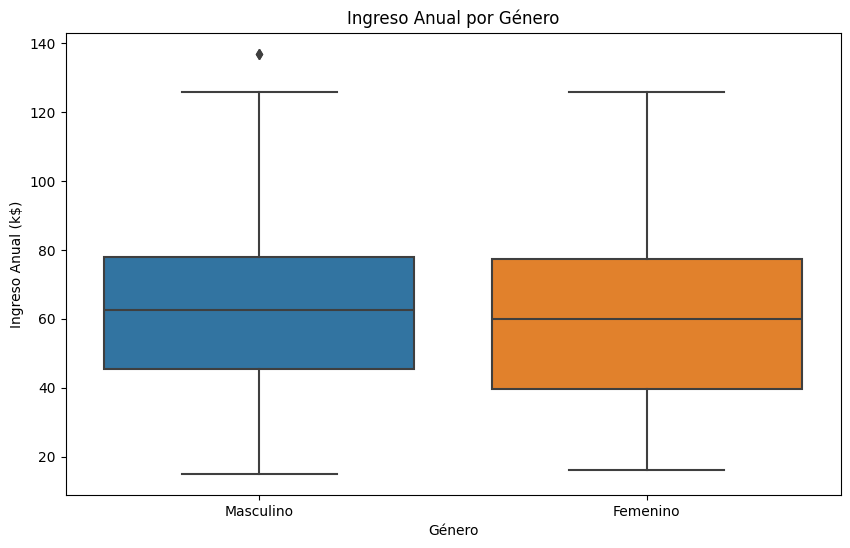

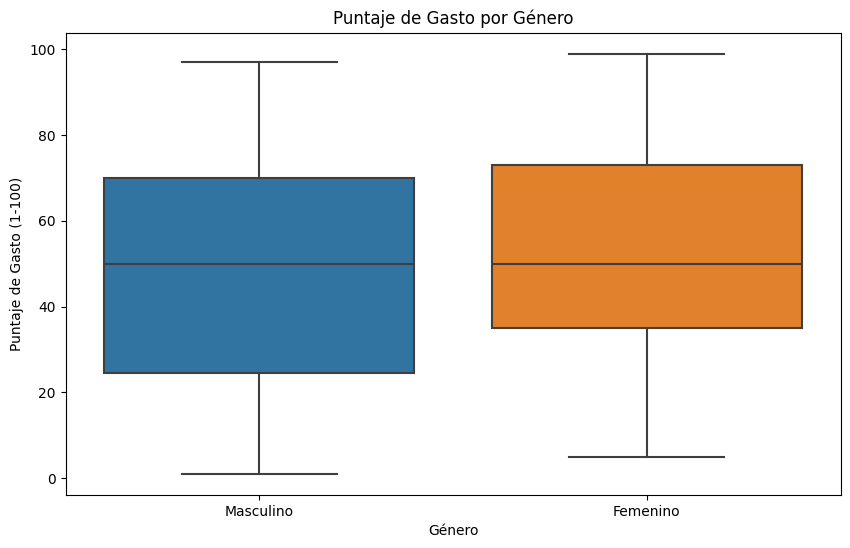

In [7]:
# Definir la ruta a la carpeta Results
results_path = '../Results'

# Asegúrate de que la carpeta Results existe
if not os.path.exists(results_path):
    os.makedirs(results_path)

# Gráfico de barras para la variable 'Gender'
plt.figure(figsize=(8, 6))
tabla_frecuencia.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.savefig(os.path.join(results_path, 'Distribucion_Genero.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Edad'
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Edad.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Ingreso Anual'
plt.figure(figsize=(10, 6))
sns.histplot(df['Ingreso_Anual'], bins=20, kde=True)
plt.title('Distribución del Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Ingreso_Anual.png'))  # Guardar el gráfico
plt.show()

# Distribución de la variable 'Spending Score'
plt.figure(figsize=(10, 6))
sns.histplot(df['Puntaje_Gasto'], bins=20, kde=True)
plt.title('Distribución del Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto (1-100)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join(results_path, 'Distribucion_Puntaje_Gasto.png'))  # Guardar el gráfico
plt.show()

# Análisis de correlación entre las variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.savefig(os.path.join(results_path, 'Matriz_Correlacion.png'))  # Guardar el gráfico
plt.show()

# Boxplot para comparar la distribución del Ingreso Anual por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Ingreso_Anual', data=df)
plt.title('Ingreso Anual por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.savefig(os.path.join(results_path, 'Ingreso_Anualpor_Genero.png'))  # Guardar el gráfico
plt.show()

# Boxplot para comparar la distribución del Puntaje de Gasto por Género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genero', y='Puntaje_Gasto', data=df)
plt.title('Puntaje de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.savefig(os.path.join(results_path, 'Puntaje_Gasto_por_Genero.png'))  # Guardar el gráfico
plt.show()



Observaciones:
- Segmentación por Edad e Ingreso: Dado que las variables de edad, ingreso y puntaje de gasto muestran una gran variación, la segmentación basada en estos factores probablemente revelará grupos de clientes con comportamientos diferentes. La dispersión en el ingreso anual y el puntaje de gasto puede ser clave para identificar diferentes niveles de poder adquisitivo y hábitos de consumo.
- Análisis por Género: Aunque el balance de género es casi equitativo, analizar diferencias en el comportamiento de gasto entre hombres y mujeres puede ofrecer ideas valiosas para campañas de marketing específicas por género.
- No se evidencia una fuerte correlacion linela entre las variables.

### Transformacion de variables


Ingresos y puntajes de gastos por grupo Edad:
            Ingreso_Anual            Puntaje_Gasto           
                    mean        std          mean        std
Grupo_Edad                                                  
18-24          43.806452  21.257813     55.774194  25.219978
25-34          71.148148  27.894956     63.166667  24.283506
35-44          66.809524  27.800893     49.428571  30.700078
45-54          58.641026  24.315348     36.230769  16.261776
55-64          56.000000  21.975744     32.312500  21.752299
65+            51.285714  12.602982     46.714286  11.431593

Ingresos y puntajes de gastos por grupo Edad y género:
                      Ingreso_Anual            Puntaje_Gasto           
                              mean        std          mean        std
Grupo_Edad Genero                                                     
18-24      Femenino      41.222222  19.585576     60.611111  22.186745
           Masculino     47.384615  23.715461     49.076923  2

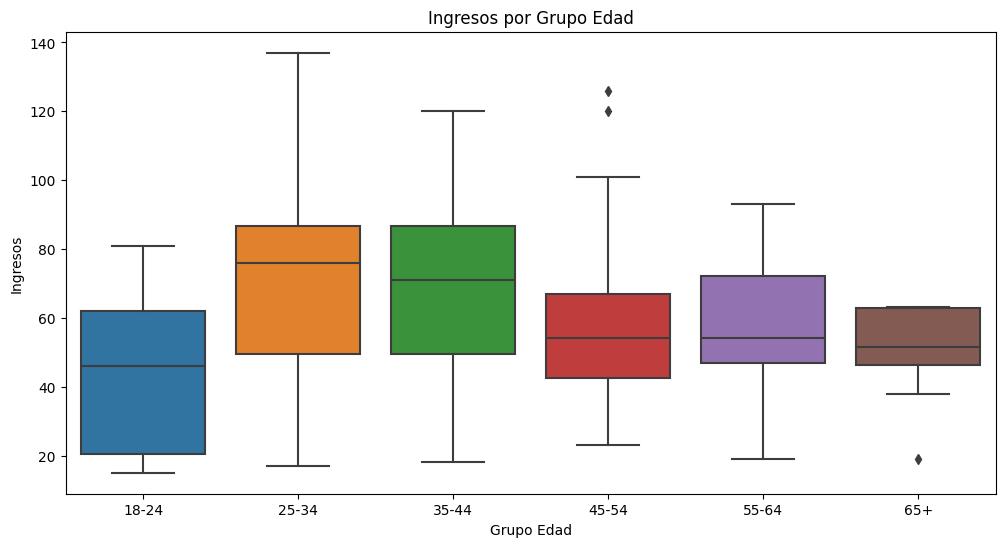

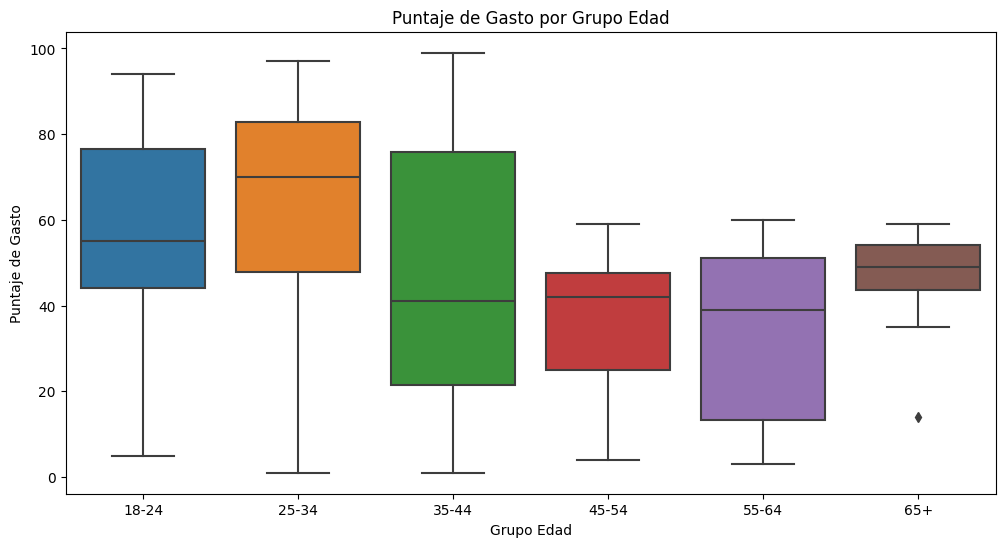

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24832\56562481.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grupo_Edad', y='Ingreso_Anual', hue='Genero', data=df, ci=None)


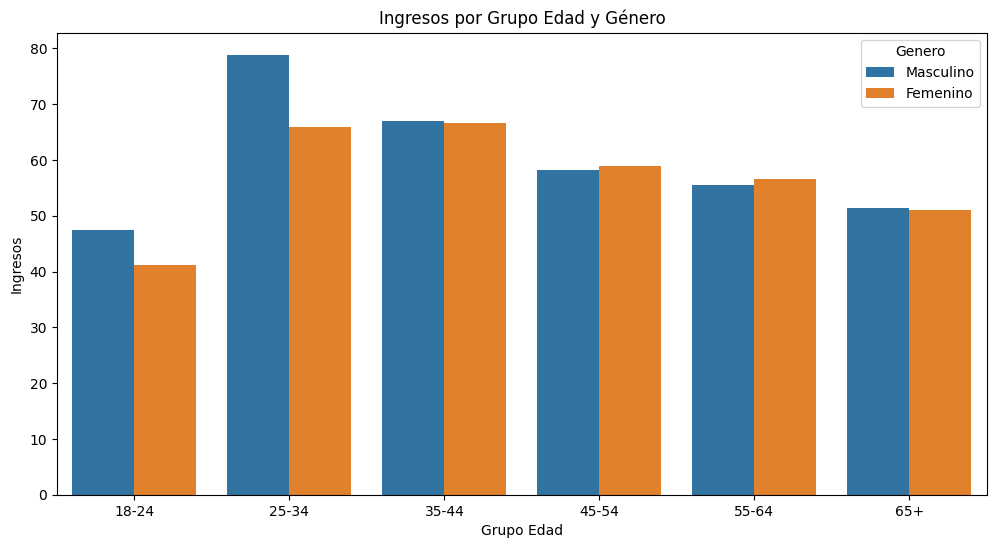

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_24832\56562481.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Grupo_Edad', y='Puntaje_Gasto', hue='Genero', data=df, ci=None)


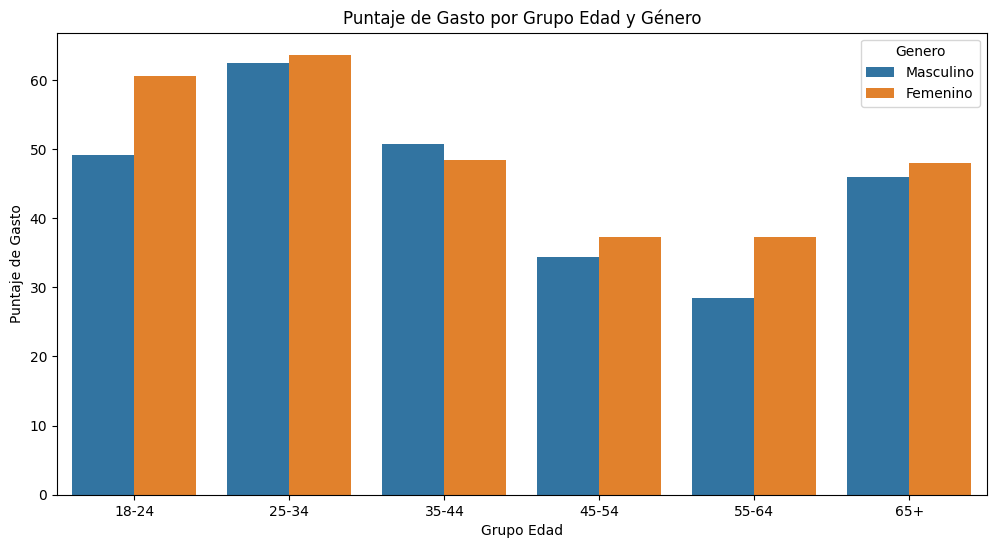

In [8]:
# Crear grupos Edads
bins = [18, 24, 34, 44, 54, 64, 120]  # Los límites de los grupos Edads
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

#Comparar ingresos y puntajes de gastos por grupos Edads
age_group_stats = df.groupby('Grupo_Edad').agg({'Ingreso_Anual': ['mean', 'std'], 'Puntaje_Gasto': ['mean', 'std']})
print("\nIngresos y puntajes de gastos por grupo Edad:\n", age_group_stats)

#Comparar ingresos y puntajes de gastos por grupos Edads y género
age_gender_stats = df.groupby(['Grupo_Edad', 'Genero']).agg({'Ingreso_Anual': ['mean', 'std'], 'Puntaje_Gasto': ['mean', 'std']})
print("\nIngresos y puntajes de gastos por grupo Edad y género:\n", age_gender_stats)

# Convertir Genero a valores binarios
df['Genero_Binario'] = df['Genero'].map({'Masculino': 1, 'Femenino': 0})

# Verificar la conversión de genero
print("\nconversión de variable genero:\n")
print(df[['Genero', 'Genero_Binario']].head())


# Boxplot de Ingresos por Grupo Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_Edad', y='Ingreso_Anual', data=df)
plt.title('Ingresos por Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Ingresos')
plt.show()

# Boxplot de Puntaje de Gasto por Grupo Edad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grupo_Edad', y='Puntaje_Gasto', data=df)
plt.title('Puntaje de Gasto por Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Puntaje de Gasto')
plt.show()

# Gráfico de Barras de Ingresos por Grupo Edad y Género
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_Edad', y='Ingreso_Anual', hue='Genero', data=df, ci=None)
plt.title('Ingresos por Grupo Edad y Género')
plt.xlabel('Grupo Edad')
plt.ylabel('Ingresos')
plt.show()


# Gráfico de Barras de Puntaje de Gasto por Grupo Edad y Género
plt.figure(figsize=(12, 6))
sns.barplot(x='Grupo_Edad', y='Puntaje_Gasto', hue='Genero', data=df, ci=None)
plt.title('Puntaje de Gasto por Grupo Edad y Género')
plt.xlabel('Grupo Edad')
plt.ylabel('Puntaje de Gasto')
plt.show()





Creación de grupos de edad:
- Se definen límites para crear grupos etarios. Las edades se agrupan en intervalos de 18-24, 25-34, 35-44, 45-54, 55-64, y 65+, lo que facilita el análisis de cómo varían el ingreso y el puntaje de gasto entre diferentes etapas de la vida.

Conversión de género a valores binarios:
- Se convierte la variable Genero en valores binarios (1 para Masculino y 0 para Femenino). Esta codificación es útil si deseas usar estos datos en un modelo de machine learning o análisis estadístico donde las variables binarias sean más manejables.

Análisis de ingresos y puntajes de gastos por grupos de edad:
- Se agrupan los datos por los grupos etarios definidos, y se calculan las medias y desviaciones estándar para las columnas Ingreso_Anual y Puntaje_Gasto.
- Esto permite entender cómo cambia el comportamiento financiero y de gasto en cada grupo de edad. Es útil para identificar segmentos con mayor poder adquisitivo o patrones de consumo más elevados.

Análisis de ingresos y puntajes de gastos por grupos de edad y género:
- Se desglosan aún más los datos, separando por género dentro de cada grupo etario, lo que permite observar si hay diferencias significativas entre hombres y mujeres en cuanto a ingresos y puntaje de gasto.
- Este análisis te permitirá identificar si las campañas de marketing podrían ajustarse no solo por edad, sino también por género dentro de cada grupo.


Resultados obtenidos:

- Ingresos y Puntajes de Gasto por Grupo de Edad:
    - 18-24 años: Este grupo tiene el ingreso promedio más bajo (43,806), pero su puntaje de gasto promedio es relativamente alto (55.77). Esto podría indicar que, aunque ganan menos, tienden a gastar proporcionalmente más en relación con su ingreso.
    - 25-34 años: El ingreso promedio más alto (71,148) y un puntaje de gasto elevado (63.17). Esto indica que este grupo está en una etapa de vida de mayores ingresos y altos niveles de consumo.
    - 35-44 años: Aunque tienen un ingreso promedio elevado (66,809), su puntaje de gasto disminuye (49.43). Esto puede ser un indicio de que en esta etapa de la vida, los individuos pueden tener más responsabilidades financieras (hipotecas, educación de los hijos), lo que reduce el gasto discrecional.
    - 45-54 años: Ingreso promedio más bajo que los grupos anteriores (58,641) y una clara disminución en el puntaje de gasto (36.23). Esto refuerza la hipótesis de que en esta etapa la gente tiende a gastar menos en bienes no esenciales.
    - 55-64 años: Un ingreso promedio similar al del grupo de 45-54 años (56,000) y un puntaje de gasto aún más bajo (32.31). Esto sugiere una tendencia continua de reducción de gastos a medida que las personas se acercan a la jubilación.
    - 65+ años: Aunque sus ingresos son más bajos que los grupos más jóvenes (51,285), su puntaje de gasto es sorprendentemente más alto que en los grupos de 45-64 años (46.71).

- Ingresos y Puntajes de Gasto por Grupo de Edad y Género:
    - 18-24 años: Las mujeres tienen ingresos más bajos que los hombres (41,222 vs. 47,385), pero su puntaje de gasto es mayor (60.61 vs. 49.08), lo que indica que las mujeres jóvenes tienden a gastar más proporcionalmente que los hombres de este grupo.
    - 25-34 años: Los hombres tienen ingresos significativamente mayores que las mujeres (78,864 vs. 65,844), pero el puntaje de gasto es similar en ambos géneros (alrededor de 63). Esto sugiere que, aunque los hombres en este grupo ganan más, no gastan proporcionalmente más que las mujeres.
    - 35-44 años: Los ingresos de hombres y mujeres son muy similares (66,625 vs. 67,056), así como sus puntajes de gasto (48.42 vs. 50.78). Este grupo parece tener una igualdad tanto en ingresos como en patrones de gasto entre géneros.
    - 45-54 años: No hay una diferencia notable en ingresos entre géneros (58,880 vs. 58,214), pero las mujeres tienden a gastar un poco más que los hombres (37.28 vs. 34.36). Esta diferencia no es muy marcada, pero indica una ligera tendencia.
    - 55-64 años: Las mujeres tienen ingresos un poco más altos que los hombres (56,571 vs. 55,556) y un puntaje de gasto más alto (37.29 vs. 28.44). Este es un grupo donde las mujeres claramente gastan más que los hombres.
    - 65+ años: Los ingresos son casi iguales para ambos géneros, pero las mujeres tienen un puntaje de gasto ligeramente superior (48.00 vs. 46.00). Esto refuerza la idea de que las mujeres mayores pueden ser más propensas a gastar.


Observaciones:

- Diferencias por edad: Los patrones de ingreso y gasto varían significativamente entre los grupos de edad. Los más jóvenes (18-24) gastan proporcionalmente más en relación a su ingreso, mientras que los grupos de mediana edad (45-64) tienden a gastar menos. Los jubilados (65+) vuelven a aumentar su gasto, posiblemente porque tienen menos responsabilidades financieras.
- Diferencias por género: Aunque en algunos grupos las diferencias en ingresos entre hombres y mujeres son notables, en la mayoría de los casos los puntajes de gasto entre géneros no varían significativamente. Sin embargo, en los grupos más jóvenes (18-24) y más mayores (55-64), las mujeres tienden a gastar más que los hombres.
- Las estrategias de marketing podrían centrarse en ajustar promociones según los grupos de edad, especialmente enfocándose en los más jóvenes y los mayores, ya que tienden a gastar más proporcionalmente.

### Estandarizacion


In [9]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
columnas_numericas = ['Edad', 'Ingreso_Anual', 'Puntaje_Gasto']
datos_numericos = df[columnas_numericas]

# Estandarizar los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos_numericos)

print(pd.DataFrame(datos_estandarizados, columns=columnas_numericas).head())

       Edad  Ingreso_Anual  Puntaje_Gasto
0 -1.424569      -1.738999      -0.434801
1 -1.281035      -1.738999       1.195704
2 -1.352802      -1.700830      -1.715913
3 -1.137502      -1.700830       1.040418
4 -0.563369      -1.662660      -0.395980


## **PCA**


In [10]:
from sklearn.decomposition import PCA

# Aplicar PCA sin restringir el número de componentes
pca_full = PCA()
pca_full.fit(datos_estandarizados)

varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

# Mostrar los valores de varianza explicada y acumulada
print("Varianza explicada por cada componente:", varianza_explicada)
print("Varianza acumulada:", varianza_acumulada)



Varianza explicada por cada componente: [0.44266167 0.33308378 0.22425454]
Varianza acumulada: [0.44266167 0.77574546 1.        ]


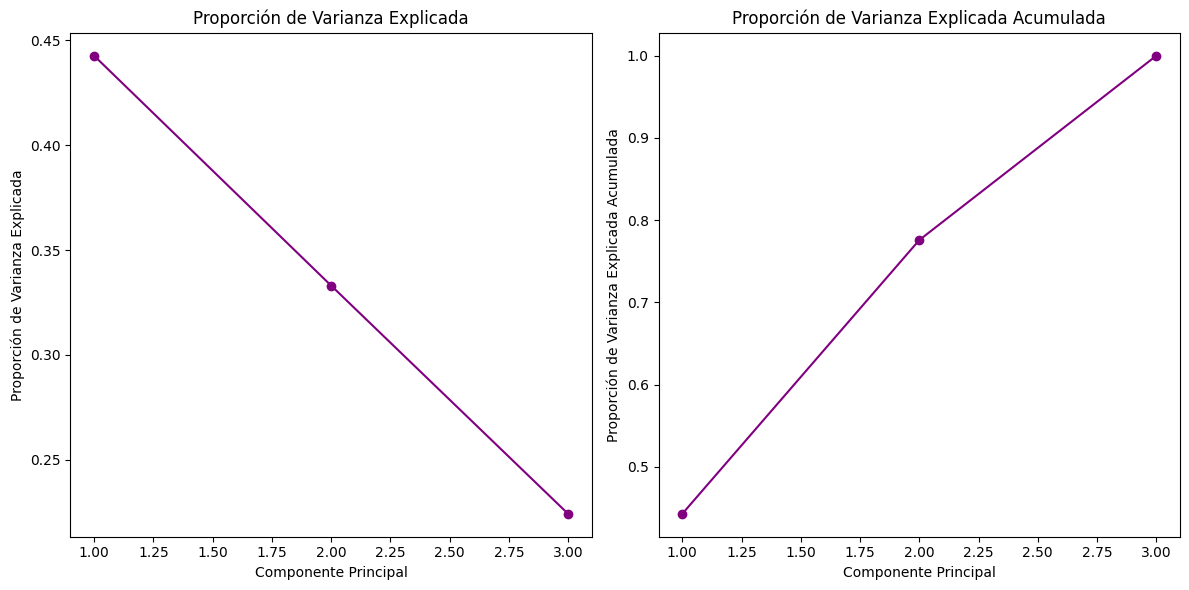

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada, marker='o', color='purple')
plt.title('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color='purple')
plt.title('Proporción de Varianza Explicada Acumulada')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')

plt.tight_layout()
plt.show()


El gráfico sugiere que cada componente contribuye de manera significativa, ya que no hay un "codo" claro que indique que puedas reducir el número de componentes sin perder mucha información.

### Cargas (Loadings) 

In [12]:
# Cargas de los componentes
cargas_pca = pd.DataFrame(pca_full.components_, columns=datos_numericos.columns, index=[f'PC{i+1}' for i in range(pca_full.n_components_)])
print("Cargas de los componentes principales:")
print(cargas_pca)



Cargas de los componentes principales:
         Edad  Ingreso_Anual  Puntaje_Gasto
PC1  0.706382      -0.048024      -0.706199
PC2  0.030141       0.998832      -0.037775
PC3 -0.707188      -0.005398      -0.707005


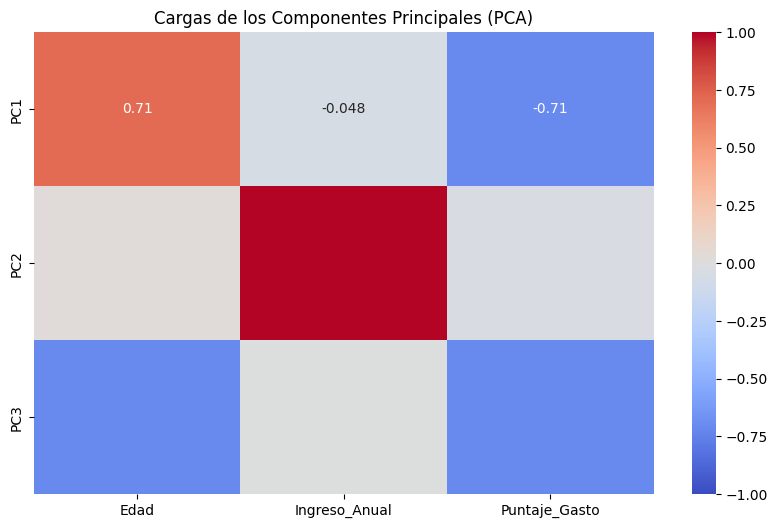

In [13]:
# Crear un heatmap para visualizar las cargas
plt.figure(figsize=(10, 6))
sns.heatmap(cargas_pca, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Cargas de los Componentes Principales (PCA)")
plt.show()


El análisis de componentes principales (PCA) para reducir la dimensionalidad de los datos numéricos estandarizados y evaluar la proporción de varianza explicada por cada componente principal. Los resultados obtenidos indicaron que no es necesario proceder con la transformación a componentes principales. Esto se debe a que cada una de las variables originales (Edad, Ingreso_Anual y Puntaje_Gasto) está contribuyendo de manera significativa y equitativa a la varianza total de los datos.

El gráfico de varianza explicada mostró que los componentes principales no ofrecen una simplificación clara, ya que no existe un componente dominante que capture una proporción sustancial de la varianza. En cambio, la varianza está distribuida de manera relativamente uniforme entre los tres componentes, lo que sugiere que todas las variables aportan información valiosa de manera independiente.

Dado que ninguna variable parece ser redundante o prescindible, el uso del PCA no proporciona una ventaja significativa en términos de simplificación o pérdida mínima de información. Por lo tanto, mantener las variables originales en el análisis resulta más apropiado para este caso.

### Algoritmos de clustering 

clustering jerárquico, y DBSCAN. K-means  y  K-medoide y Modelo  de 
Mezcla Gaussiana (GMM)

#### Clustering Jerárquico

In [14]:
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns=columnas_numericas)
datos_estandarizados['Genero_Binario'] = df['Genero_Binario']

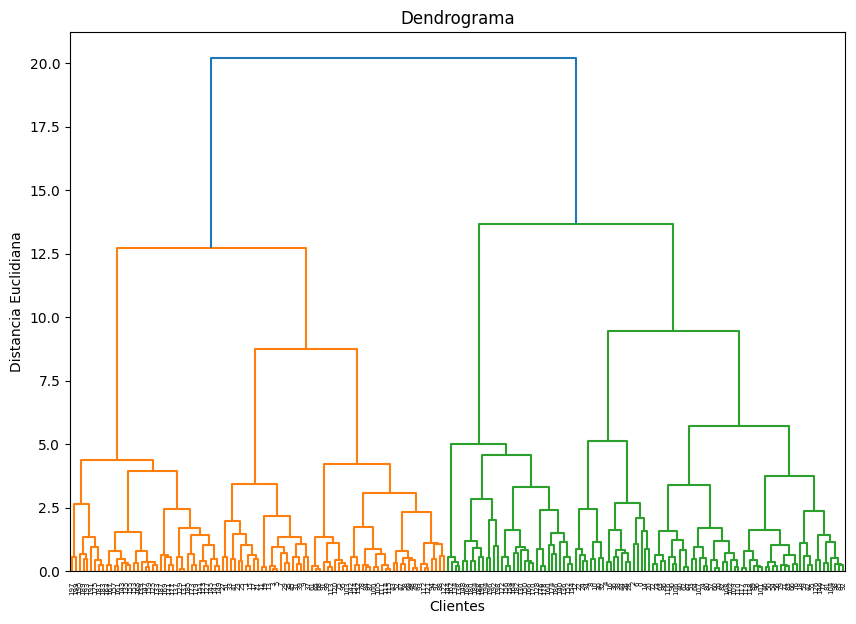

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrograma para encontrar el número óptimo de clusters
plt.figure(figsize=(10, 7))
dendrograma = sch.dendrogram(sch.linkage(datos_estandarizados, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Aplicar Clustering Jerárquico
num_clusters = 6  # Número de clusters desde el dendograma
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(datos_estandarizados)

# Agregar la columna de clusters jerárquicos al DataFrame original
df['Cluster_Jerarquico'] = y_hc




In [21]:
# Agrupar por 'Cluster_Jerarquico' y calcular las estadísticas
cluster_descriptions = df.groupby('Cluster_Jerarquico').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)


Descripción de los clusters encontrados:
                     Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_Jerarquico                                                             
0                            53.620000          10.020163                 23   
1                            25.250000           7.397546                 15   
2                            89.090909          16.451375                 71   
3                            86.538462          16.312485                 69   
4                            57.228571           9.985536                 39   
5                            26.434783           8.134249                 15   

                    Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_Jerarquico                                                             
0                                  77           48.240000           7.133022   
1                                  39           19.050000          12.910522 

#### DBSCAN

In [28]:
datos_estandarizados['Grupo_Edad'] = df['Grupo_Edad']
#datos_estandarizados['Grupo_Edad'] = datos_estandarizados['Grupo_Edad'].astype('str')


,Edad,Ingreso_Anual,Puntaje_Gasto,Genero_Binario
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


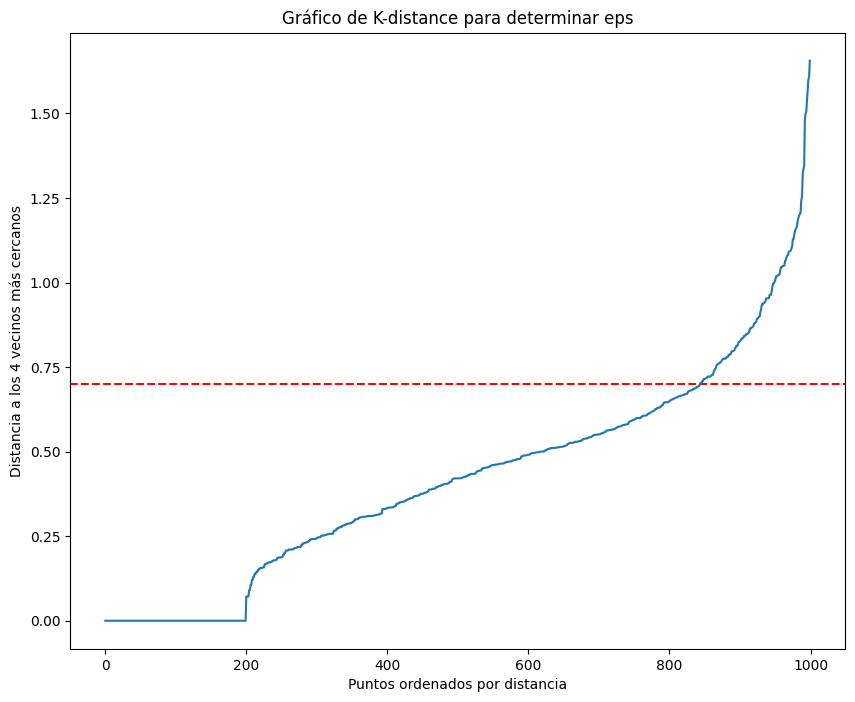

La parte exponencial de la curva comienza alrededor de una distancia de:  0.7221407011232333
Número de clusters encontrados por DBSCAN: 8
Descripción de los clusters encontrados:
                 Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_DBSCAN                                                             
-1                       59.227273          47.669429                 15   
 0                       24.875000           6.854352                 15   
 1                       55.893617          22.654235                 16   
 2                       62.878788          15.436883                 39   
 3                       55.545455           8.347019                 42   
 4                       81.562500          10.321297                 69   
 5                       76.250000           3.593976                 73   
 6                       88.333333          11.734435                 73   

                Ingreso_Anual_Max  Puntaje_Gasto_Mean  Punt

In [27]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Calcular las distances a los 4 vecinos más cercanos, conjuntos de datos pequeños (menos de 1000 puntos): Puedes usar un valor de n_neighbors entre 3 y 5.
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(datos_estandarizados)
distances, indices = neighbors_fit.kneighbors(datos_estandarizados)

# Ordenar las distances y graficar
distances = np.sort(distances.flatten())
plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.7, color = 'r', linestyle = '--')
plt.plot(distances)
plt.title('Gráfico de K-distance para determinar eps')
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia a los 4 vecinos más cercanos')
plt.show()


from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print("La parte exponencial de la curva comienza alrededor de una distancia de: ",distances[knee.knee])

# Elegimos eps basado en el gráfico y en Knee, tomamos min_samples=4 (valor común para datasets medianos)
eps_value = distances[knee.knee]  
dbscan = DBSCAN(eps=eps_value, min_samples=4)
df['Cluster_DBSCAN'] = dbscan.fit_predict(datos_estandarizados)

# Contar el número de clusters
num_clusters_dbscan = len(np.unique(df['Cluster_DBSCAN'])) - (1 if -1 in df['Cluster_DBSCAN'] else 0)
print(f'Número de clusters encontrados por DBSCAN: {num_clusters_dbscan}')


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_DBSCAN').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)



#### K-Means

In [31]:
datos_estandarizados

,Edad,Ingreso_Anual,Puntaje_Gasto,Genero_Binario
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


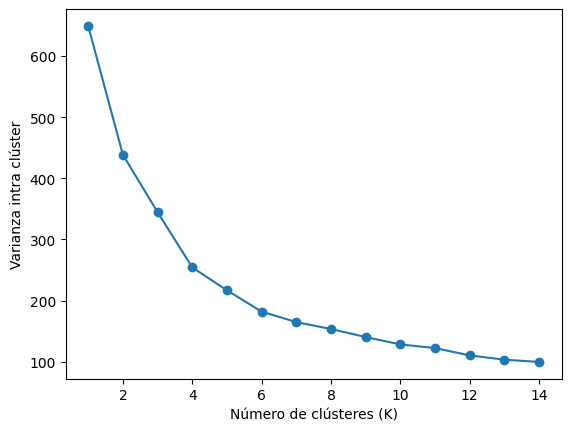

Descripción de los clusters encontrados:
                 Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_KMeans                                                             
0                        54.266667           8.975725                 38   
1                        86.538462          16.312485                 69   
2                        26.285714           7.437357                 16   
3                        88.500000          16.533254                 71   
4                        25.260870           7.723738                 15   
5                        56.657895           9.905708                 39   

                Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_KMeans                                                             
0                              79           49.066667           6.300794   
1                             137           82.128205           9.364489   
2                              39           1

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# bucle for para generar los distintos modelos y calcular la varianza-intra-clusters y el coeficiente de Silhouette

Y = {}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 15): # Evaluamos entre 1 a 120 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(datos_estandarizados)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(datos_estandarizados, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_


#Generar "grafica método del codo"
plt.plot(range(1, 15), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()


# Aplicar K-Means con un número de clusters (por ejemplo 5)
kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(datos_estandarizados)

# Agregar la columna de clusters de K-Means al DataFrame original
df['Cluster_KMeans'] = y_kmeans


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_KMeans').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)

#### K-Medoide

In [39]:
from sklearn_extra.cluster import KMedoids


# Aplicar K-Medoides en los datos estandarizados originales
kmedoids = KMedoids(n_clusters=6, random_state=42, method='pam')
y_kmedoids = kmedoids.fit_predict(datos_estandarizados)

# Agregar la columna de clusters de K-Means al DataFrame original
df['Cluster_kmedoids'] = y_kmedoids


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_kmedoids').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)

Descripción de los clusters encontrados:
                   Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_kmedoids                                                             
0                          86.538462          16.312485                 69   
1                          24.304348           7.295296                 15   
2                          48.906250          13.289237                 19   
3                          54.117647          12.355258                 16   
4                          46.421053          16.450797                 18   
5                          88.500000          16.533254                 71   

                  Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_kmedoids                                                             
0                               137           82.128205           9.364489   
1                                38           76.521739          15.231157   
2                    

#### Modelo de Mezcla Gaussiana (GMM)

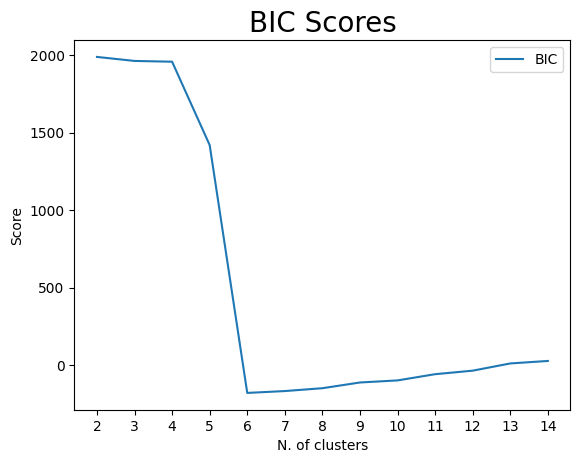

In [48]:
from sklearn.mixture import GaussianMixture

def SelBest(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 15)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(datos_estandarizados) 
        
        tmp_bic.append(gmm.bic(datos_estandarizados))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

plt.errorbar(n_clusters,bics, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

In [45]:

# Aplicar GMM
gmm = GaussianMixture(n_components=6, random_state=42)
y_gmm = gmm.fit_predict(datos_estandarizados)

# Agregar la columna de clusters de GMM al DataFrame original
df['Cluster_GMM'] = y_gmm


# Descripción de los clusters encontrados
cluster_descriptions = df.groupby('Cluster_GMM').agg({
    'Ingreso_Anual': ['mean', 'std', 'min', 'max'],
    'Puntaje_Gasto': ['mean', 'std', 'min', 'max'],
    'ID_Cliente': 'count',  # Número total de clientes en cada cluster
    'Genero': [
        lambda x: (x == 'Masculino').sum(),  # Conteo de género Masculino
        lambda x: (x == 'Femenino').sum()    # Conteo de género Femenino
    ]
})

# Renombrar las columnas para que 'count' de 'ID_Cliente' sea 'Num_Clientes' 
# y distinguir los géneros
cluster_descriptions.columns = [
    'Ingreso_Anual_Mean', 'Ingreso_Anual_Std', 'Ingreso_Anual_Min', 'Ingreso_Anual_Max',
    'Puntaje_Gasto_Mean', 'Puntaje_Gasto_Std', 'Puntaje_Gasto_Min', 'Puntaje_Gasto_Max',
    'Num_Clientes', 'Num_Masculino', 'Num_Femenino'
]

# Mostrar los resultados
print("Descripción de los clusters encontrados:\n", cluster_descriptions)

Descripción de los clusters encontrados:
              Ingreso_Anual_Mean  Ingreso_Anual_Std  Ingreso_Anual_Min  \
Cluster_GMM                                                             
0                     55.750000           8.713017                 40   
1                     86.538462          16.312485                 69   
2                     26.304348           7.893811                 15   
3                     89.090909          16.451375                 71   
4                     24.950000           7.287155                 15   
5                     54.363636          11.523938                 28   

             Ingreso_Anual_Max  Puntaje_Gasto_Mean  Puntaje_Gasto_Std  \
Cluster_GMM                                                             
0                           77           49.076923           6.522498   
1                          137           82.128205           9.364489   
2                           39           20.913043          13.017167   
3       

### Visualizacion


In [69]:
import plotly.express as px

print("Vizualizacion de clusters proyeccion en 3D (Ingreso_Anual, Puntaje_Gasto, Edad):\n")
# Variables a graficar
x = df['Ingreso_Anual'] 
y = df['Puntaje_Gasto']
z = df['Edad']

# Lista de columnas de cluster
clusters = ['Cluster_Jerarquico', 'Cluster_DBSCAN', 'Cluster_KMeans', 'Cluster_kmedoids', 'Cluster_GMM']


# Crear un gráfico 3D interactivo para cada columna de cluster
for cluster in clusters:
    fig = px.scatter_3d(df, x='Ingreso_Anual', y='Puntaje_Gasto', z='Edad',
                        color=cluster, color_continuous_scale='Viridis', title=f'Cluster basado en {cluster}')
    
    # Definir nombre del archivo
    file_name = f"{cluster}_3D.html"
    
    # Guardar el gráfico como archivo HTML
    fig.write_html(os.path.join(results_path, file_name))

    # Mostrar gráfico interactivo
    fig.show()


Vizualizacion de clusters proyeccion en 3D (Ingreso_Anual, Puntaje_Gasto, Edad):



In [70]:

print("Vizualizacion de clusters proyeccion en 2D (Ingreso_Anual, Puntaje_Gasto):\n")
# Variables que vamos a graficar
x = df['Ingreso_Anual']
y = df['Puntaje_Gasto']

# Lista de columnas de cluster
clusters = ['Cluster_Jerarquico', 'Cluster_DBSCAN', 'Cluster_KMeans', 'Cluster_kmedoids', 'Cluster_GMM']

# Crear un gráfico 2D interactivo para cada columna de cluster
for cluster in clusters:
    fig = px.scatter(df, x='Ingreso_Anual', y='Puntaje_Gasto',
                     color=cluster, color_continuous_scale='Viridis', 
                     title=f'Cluster basado en {cluster}',
                     labels={'Ingreso_Anual': 'Ingreso Anual', 'Puntaje_Gasto': 'Puntaje de Gasto'})
    

    # Definir nombre del archivo
    file_name = f"{cluster}_2D.html"
    
    # Guardar el gráfico como archivo HTML
    fig.write_html(os.path.join(results_path, file_name))

    # Mostrar gráfico interactivo
    fig.show()


Vizualizacion de clusters proyeccion en 2D (Ingreso_Anual, Puntaje_Gasto):



Observaciones: 
- Cluster Jerárquico:
    - Cluster 3 se destaca como el grupo de mayor poder adquisitivo y gasto elevado, lo que lo convierte en el target ideal para productos y servicios de lujo.
    - Cluster 1 y Cluster 5 son interesantes ya que, aunque ambos tienen ingresos bajos, difieren notablemente en sus patrones de gasto. Cluster 5 está dispuesto a gastar más pese a sus menores ingresos, lo que lo convierte en un grupo a considerar para productos de bajo costo pero alta rotación.
    - Cluster 2 incluye a clientes con altos ingresos pero que no gastan mucho en el centro comercial, lo que sugiere una oportunidad para explorar nuevas estrategias para incentivarlos a gastar más.

- DBSCAN:
    - Cluster -1 (Ruido): Este grupo representa datos dispersos que no se ajustan bien a ningún cluster claro, y es muy heterogéneo en términos de ingresos y gasto.
    - Cluster 0 y Cluster 4: Son clusters interesantes porque muestran clientes con bajos ingresos pero un alto puntaje de gasto (Cluster 0) y clientes con altos ingresos y alto gasto (Cluster 4), lo que representa a dos segmentos importantes: consumidores más frugales y consumidores de lujo.
    - Cluster 5 y Cluster 6: Estos clusters muestran clientes con altos ingresos que no gastan mucho, lo que indica una oportunidad de atraerlos con promociones o productos más alineados a sus intereses.

- K-Means:
    - Cluster 1 y Cluster 3 destacan por sus altos ingresos, pero se diferencian claramente en el comportamiento de gasto: mientras que los consumidores del Cluster 1 gastan mucho, los del Cluster 3 tienden a gastar poco, lo que sugiere estrategias de marketing diferentes para atraer a estos últimos.
    - Cluster 4 es interesante por su alto puntaje de gasto a pesar de los ingresos bajos, lo que indica un grupo dispuesto a gastar más de lo que cabría esperar, posiblemente en productos de alta prioridad para ellos.
    - Cluster 2 y Cluster 4 representan extremos en términos de gasto, con el Cluster 2 mostrando un comportamiento de consumo muy limitado.

- K-Medoids: 
    - Cluster 0 y Cluster 5 destacan por sus altos ingresos, pero se diferencian claramente en el comportamiento de gasto: mientras que los consumidores del Cluster 0 gastan mucho, los del Cluster 5 gastan poco, lo que sugiere diferentes estrategias para cada grupo.
    - Cluster 1 es interesante debido a su alto puntaje de gasto a pesar de los ingresos bajos, lo que indica un grupo dispuesto a gastar más de lo que cabría esperar, probablemente en productos prioritarios.
    - Cluster 2, Cluster 3 y Cluster 4 representan consumidores de ingresos y gastos moderados, pero Cluster 4 es particularmente interesante por ser predominantemente femenino, lo que podría implicar estrategias de marketing dirigidas a este género.


- Mezcla Gaussiana (GMM):
    - Cluster 1 y Cluster 4 son los más interesantes desde el punto de vista de estrategias de marketing. El Cluster 1 incluye a clientes de alto poder adquisitivo y dispuestos a gastar, mientras que el Cluster 4 incluye a clientes con bajos ingresos pero que gastan mucho.
    - Cluster 3 es un segmento de alto poder adquisitivo que, sin embargo, no gasta mucho en el centro comercial, lo que representa una oportunidad para atraer a estos consumidores a realizar más compras.
    - Cluster 0 y Cluster 5 representan a consumidores de ingresos y gastos medios, siendo consumidores regulares y estables que probablemente mantienen un comportamiento de compra consistente.

### Estrategias de Marketing

Estrategias de Marketing para el Modelo de Mezcla Gaussiana (GMM):
Cluster 1 (Alta Capacidad de Gasto):
Estrategia: Ofrecer productos y servicios premium y de lujo, promociones exclusivas, membresías VIP, y campañas personalizadas para estos clientes de alto poder adquisitivo que están dispuestos a gastar significativamente.

Cluster 4 (Bajo Ingreso, Alto Gasto):
Estrategia: Promociones orientadas a productos de alta rotación o esenciales para este segmento que, a pesar de tener bajos ingresos, muestra un alto interés en gastar. Es crucial ofrecer descuentos atractivos o sistemas de financiación para maximizar sus compras.

Cluster 3 (Alto Ingreso, Bajo Gasto):
Estrategia: Este grupo puede ser incentivado a gastar más con campañas que resalten el valor y exclusividad del centro comercial. Estrategias como experiencias de cliente personalizadas, recomendaciones de productos basados en sus intereses, o eventos exclusivos pueden atraer su atención.

Cluster 0 y Cluster 5 (Ingresos y Gastos Moderados):
Estrategia: El factor diferencial es la edad, por lo que campañas de marketing regulares, promociones estacionales y programas de fidelización que mantengan el compromiso de estos clientes estables. Enfocado partir de la edad de los clientes buscando generar beneficios y incentivos para seguir gastando de forma consistente.

Cluster 2  muestra un comportamiento de consumo muy limitado, por lo que seria el ultimo grupo a abordar con campañas dado al alto riesgo de que las campañas no tengan efecto dado su capcidad de compra, tambien se puede plantear alguna estrategia crediticia agresiva sobre productos de alta demanda e indipensables para garantizar compras.